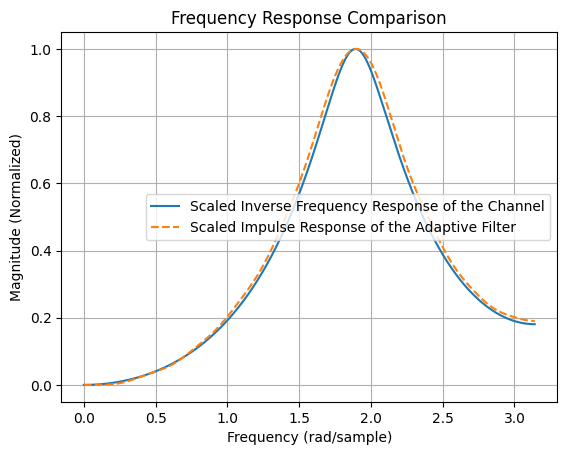

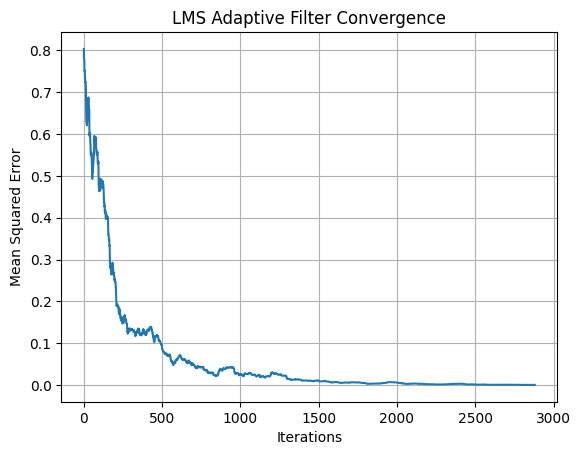

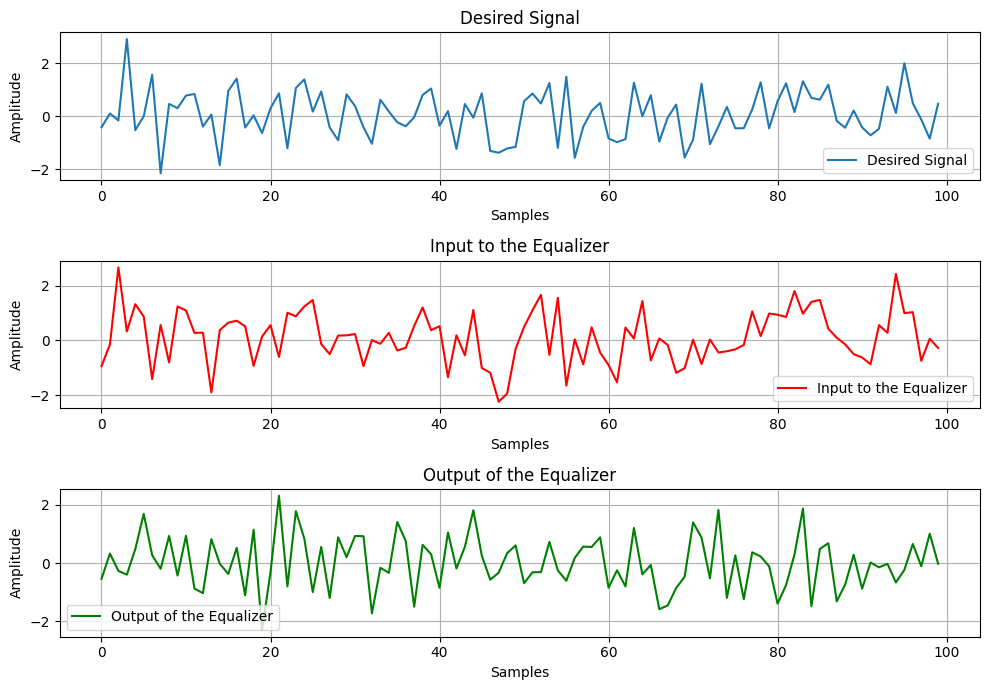

<Figure size 640x480 with 0 Axes>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz, lfilter

# Given parameters
h = np.array([0.9, 0.3, 0.5, -0.1])  # Channel impulse response
alpha = 0.005  # LMS step size
N = 20  # Adaptive filter order
itr = 3000  # Number of iterations

# Generate random signal
Sk = np.random.randn(itr)

# Generate noise
noise = 0.01 * np.random.randn(itr)  # Small noise

# Convolve signal with channel
rk = np.convolve(Sk, h, mode='same') + noise

# Initialize filter weights and error tracking
w = np.zeros(N)
g = np.zeros(N)
errors = []

# LMS Adaptive Filtering
for i in range(N, itr):
    x = rk[i-N:i]  # Input vector
    d = Sk[i]  # Desired signal
    y = np.dot(w, x)  # Filter output
    e = d - y  # Error
    w += alpha * e * x  # Weight update (LMS rule)
    errors.append(e**2)

# Print the impulse response of the equalizer

# Compute and plot frequency response of the channel
w_h, H = freqz(h, worN=8000)
H_Inverse = 20 * np.log10(1 / np.abs(H))
H_Inverse = (H_Inverse - np.min(H_Inverse)) / (np.max(H_Inverse) - np.min(H_Inverse))  # Scale between 0 and 1

# Compute and plot impulse response of the adaptive filter
w_f, W = freqz(w, worN=8000)
W_Scaled = (20 * np.log10(np.abs(W)) - np.min(20 * np.log10(np.abs(W)))) / (np.max(20 * np.log10(np.abs(W))) - np.min(20 * np.log10(np.abs(W))))

plt.figure()
plt.plot(w_h, H_Inverse, label='Scaled Inverse Frequency Response of the Channel')
plt.plot(w_f, W_Scaled, label='Scaled Impulse Response of the Adaptive Filter', linestyle='dashed')
plt.xlabel('Frequency (rad/sample)')
plt.ylabel('Magnitude (Normalized)')
plt.title('Frequency Response Comparison')
plt.legend()
plt.grid()
plt.show()

# Plot Mean Squared Error
plt.plot(np.convolve(errors, np.ones(100)/100, mode='valid'))  # Smoothed MSE plot
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('LMS Adaptive Filter Convergence')
plt.grid()
plt.show()

# Apply the adaptive filter to the received signal
output_eq = lfilter(w, 1, rk)

# Subplots for input of the equalizer and output of the channel
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(Sk[itr-100:], label='Desired Signal')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Desired Signal')
plt.legend()
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(rk[itr-100:], label='Input to the Equalizer', color='r')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Input to the Equalizer')
plt.legend()
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(output_eq[itr-100:], label='Output of the Equalizer', color='g')
plt.xlabel('Samples')
plt.ylabel('Amplitude')
plt.title('Output of the Equalizer')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


plt.tight_layout()
plt.show()